In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Importing the dataset from keras
df = keras.datasets.cifar10.load_data()
# The data is in the form of a tuple
# The data has already been split into training & testing
x_train = df[0][0]
y_train = df[0][1]
x_test = df[1][0]
y_test = df[1][1]

In [3]:
# The train data contains 50,000 images with each image of dimension (32 x 32 x 3), where 3 -> no of RGB channels
x_train.shape

(50000, 32, 32, 3)

In [4]:
# Contains the labels of the images(objects) 
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
# Reshaping the target classes to a 1D array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
# The different types of images present in the data
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [21]:
# To display the image & label of a record in the dataset
def show_image(x,y,index):
    plt.figure(figsize = (15,2.5))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

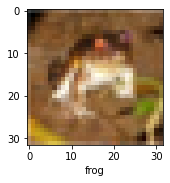

In [22]:
show_image(x_train,y_train,0)

In [9]:
# Since the data contains values of high difference (because of the RGB values, let us scale them)
x_train = x_train/255
x_test = x_test/255

#### CNN Model

In [10]:
# Specifying the layers
model = keras.Sequential(
        [
        # Convolutional Layers
        keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)), # Convolutional layer 1
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        
        keras.layers.Conv2D(filters = 48, kernel_size = (3,3), activation = 'relu'),  # Convolutional layer 2
        keras.layers.MaxPooling2D(pool_size = (2,2)),
            
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),  # Convolutional layer 3
        keras.layers.MaxPooling2D(pool_size = (2,2)),
            
        # Flattening the 3D array to 1D to build a simple densely connected ANN
        keras.layers.Flatten(), 
        
        # Dense Layers   
        keras.layers.Dense(500,activation = 'relu'), # Dense layer 1
        keras.layers.Dense(10,activation = 'softmax') # Dense layer 2
        ]
)

# Specifying the loss & optimizer function
model.compile(optimizer = "SGD",loss = "SparseCategoricalCrossentropy",metrics = ["accuracy"])

# Fitting the model with train data
model_history = model.fit(x_train,y_train,epochs = 10)
model_history

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 2.1322 - accuracy: 0.2032
Epoch 2/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.8360 - accuracy: 0.3269
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.6033 - accuracy: 0.4159
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4696 - accuracy: 0.4666
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3856 - accuracy: 0.5018
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3174 - accuracy: 0.5265
Epoch 7/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.2582 - accuracy: 0.5503
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2070 - accuracy: 0.5725
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1598 - accuracy: 0.5912
Epoch 10/10
1563/1563 [==============================] - 63s 40m

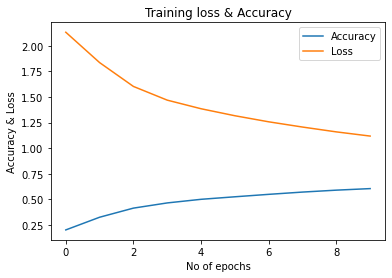

In [11]:
# Plotting the training loss & accuracy
plt.title('Training loss & Accuracy')
plt.xlabel('No of epochs')
plt.ylabel('Accuracy & Loss')
plt.plot(model_history.history["accuracy"],label = 'Accuracy')
plt.plot(model_history.history["loss"], label = 'Loss')
plt.legend()

In [12]:
# Evaluating the model on test data
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.1234 - accuracy: 0.5999


[1.1233878135681152, 0.5999000072479248]

##### Evaluating the model for train data

In [53]:
# Predicting the test data
y_pred = model.predict(x_test)
y_pred = [np.argmax(data) for data in y_pred]

313/313 [==============================] - 5s 14ms/step


In [74]:
# Taking any 2 random images from the training data
training_data = [np.random.randint(0,x_train.shape[0]) for i in range(2)]
training_data # Contains the indices of the images

[33295, 14047]

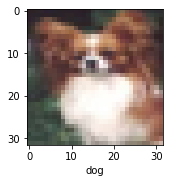

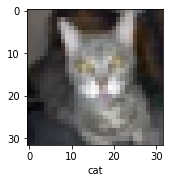

In [75]:
# Taking training image
for index in training_data:
    show_image(x_train,y_train,index)

In [76]:
# Actual class of the train image
actual_class = []
for i in training_data:
    actual_class.append(classes[y_train[i]])

In [77]:
# Predicted class of the train image
predicted_class = []
for i in testing_data:
    predicted_class.append(classes[(y_pred[i])])

In [78]:
print("Actual class: ",actual_class)
print("Predicted class: ",predicted_class)

Actual class:  ['dog', 'cat']
Predicted class:  ['dog', 'bird']


##### Evaluating the model for test data 

In [84]:
# Taking any 2 random images from the test data
testing_data = [np.random.randint(0,x_test.shape[0]) for i in range(2)]
testing_data # Contains the indices of the images

[1683, 478]

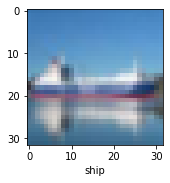

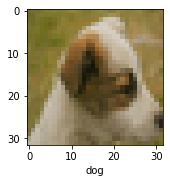

In [85]:
# Taking a test image
for index in testing_data:
    show_image(x_test,y_test,index)

In [86]:
# Actual class of the test image
actual_class = []
for i in testing_data:
    actual_class.append(classes[y_test[i]])

In [87]:
# Predicted class of the test image
predicted_class = []
for i in testing_data:
    predicted_class.append(classes[(y_pred[i])])

In [88]:
print("Actual class: ",actual_class)
print("Predicted class: ",predicted_class)

Actual class:  ['ship', 'dog']
Predicted class:  ['ship', 'dog']


In [18]:
from sklearn.metrics import classification_report

print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.55      0.63      1000
           1       0.64      0.81      0.72      1000
           2       0.46      0.50      0.48      1000
           3       0.46      0.35      0.40      1000
           4       0.56      0.47      0.51      1000
           5       0.46      0.60      0.52      1000
           6       0.64      0.75      0.69      1000
           7       0.73      0.59      0.65      1000
           8       0.72      0.71      0.72      1000
           9       0.66      0.66      0.66      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000

